In [122]:
import numpy as np
from scipy.integrate import odeint

# visualize
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%config InlineBackend.figure_formats = {'png', 'retina'}
import japanize_matplotlib

from matplotlib import ticker, cm

ナイーブにロトカヴォルテラ

In [2]:
def func(V,t,a,b,c,d):
    N=V[0]*(a-b*V[1])
    P=V[1]*(c*V[0]-d)
    return [N,P]

In [3]:
a,b,c,d=10,0.1,5,11
V0=[1000,100] #被食者、捕食者
t = np.arange(0, 10, 0.001)

v=odeint(func,V0,t,args=(a,b,c,d))

Text(0.5, 0, 't')

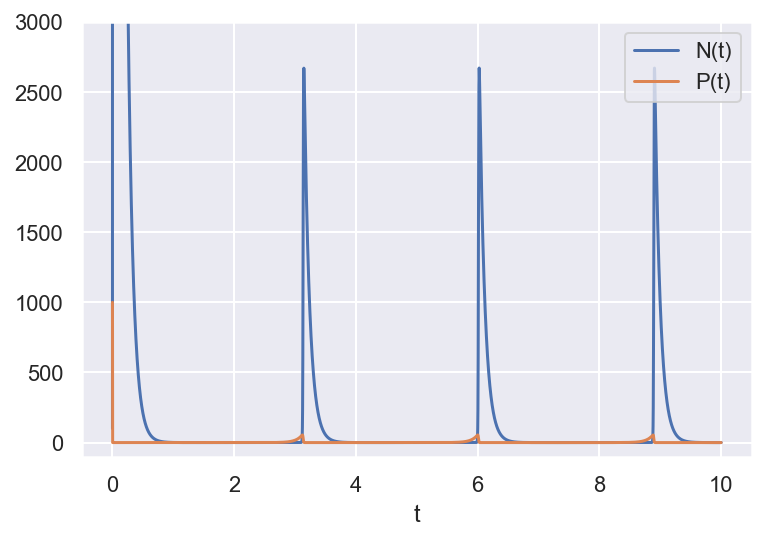

In [4]:
plt.plot(t,v[:,1],label='N(t)')
plt.plot(t,v[:,0],label='P(t)')
plt.ylim(-100,3000)
plt.legend(loc='upper right')
plt.xlabel('t')

#ロトカ・ヴォルテラの解の一例

Text(0, 0.5, 'P(t)')

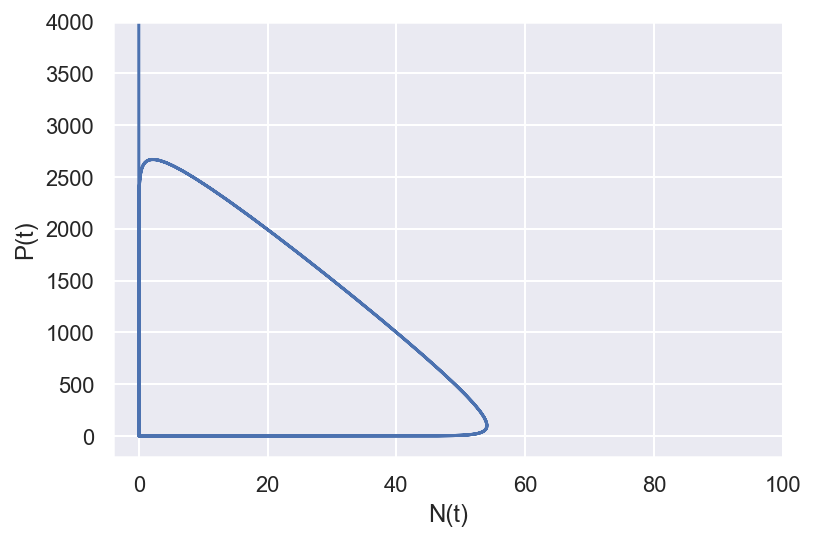

In [5]:
plt.plot(v[:,0],v[:,1])
plt.xlim(-4,100)
plt.ylim(-200,4000)
plt.xlabel('N(t)')
plt.ylabel('P(t)')

解軌跡の等高線

In [38]:
def ret_H(u,v,alp):
    return alp*u + v - np.log(u**alp) - np.log(v)

In [78]:
u = np.arange(0.0001, 5, 0.001) # x軸
v = np.arange(0.0001, 5, 0.001) # y軸

In [79]:
U, V = np.meshgrid(u, v)

In [80]:
alp=1
H=ret_H(U,V,alp)

In [81]:
H

array([[18.42088074, 16.02398547, 15.37835831, ..., 12.59868263,
        12.59948253, 12.60028248],
       [16.02398547, 13.6270902 , 12.98146303, ..., 10.20178736,
        10.20258726, 10.2033872 ],
       [15.37835831, 12.98146303, 12.33583587, ...,  9.55616019,
         9.55696009,  9.55776004],
       ...,
       [12.59868263, 10.20178736,  9.55616019, ...,  6.77648451,
         6.77728442,  6.77808436],
       [12.59948253, 10.20258726,  9.55696009, ...,  6.77728442,
         6.77808432,  6.77888426],
       [12.60028248, 10.2033872 ,  9.55776004, ...,  6.77808436,
         6.77888426,  6.77968421]])

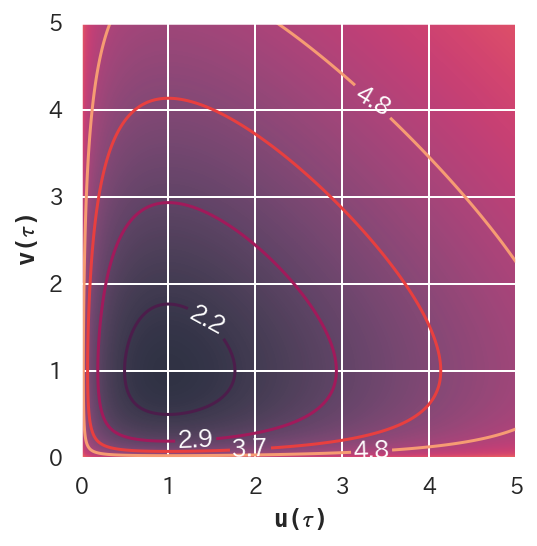

In [124]:
cont = plt.contour(U, V, np.minimum(H,5) ,locator=ticker.LogLocator(base=1.3))
cont.clabel(fmt='%1.1f', fontsize=12, colors='white')
plt.imshow(np.log(H), extent=[0, 5, 0, 5], origin='lower',alpha=0.8)
plt.xlabel(r'$u(\tau)$')
plt.ylabel(r'$v(\tau)$')
plt.show()

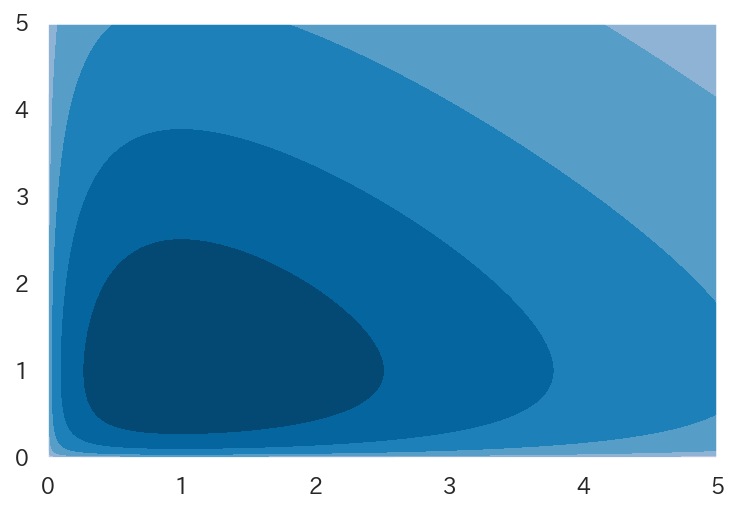

In [125]:
plt.contourf(U, V, H, locator=ticker.LogLocator(base=1.1), cmap=cm.PuBu_r)

alphaが変化すると？

In [134]:
def show_contourf(alp):
    H=ret_H(U,V,alp)
    plt.contourf(U, V, H, locator=ticker.LogLocator(base=1.1), cmap=cm.PuBu_r)
    plt.xlabel(r'u')
    plt.ylabel(r'v')
    plt.title(f'$\\alpha = {alp}$')
    plt.show()

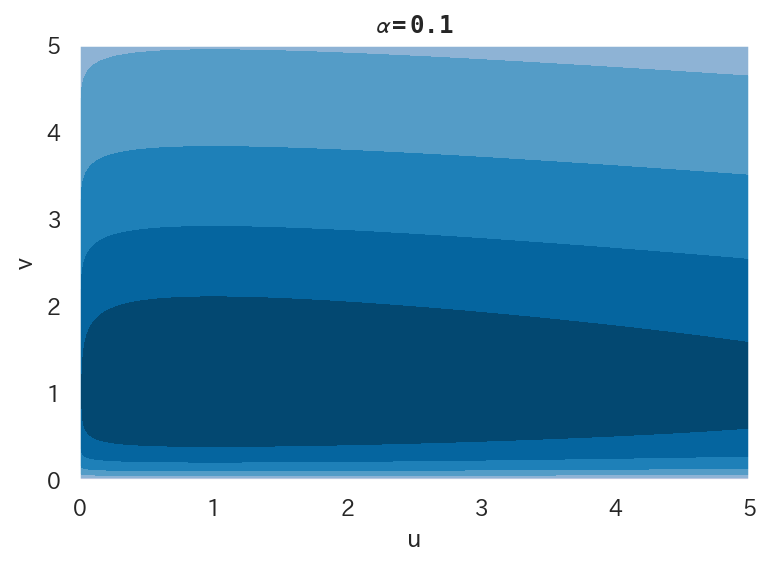

In [135]:
show_contourf(0.1)

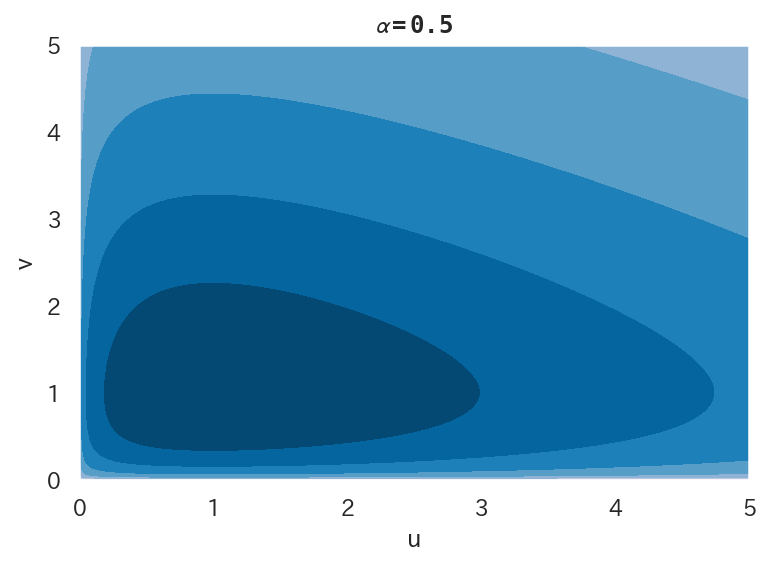

In [136]:
show_contourf(0.5)

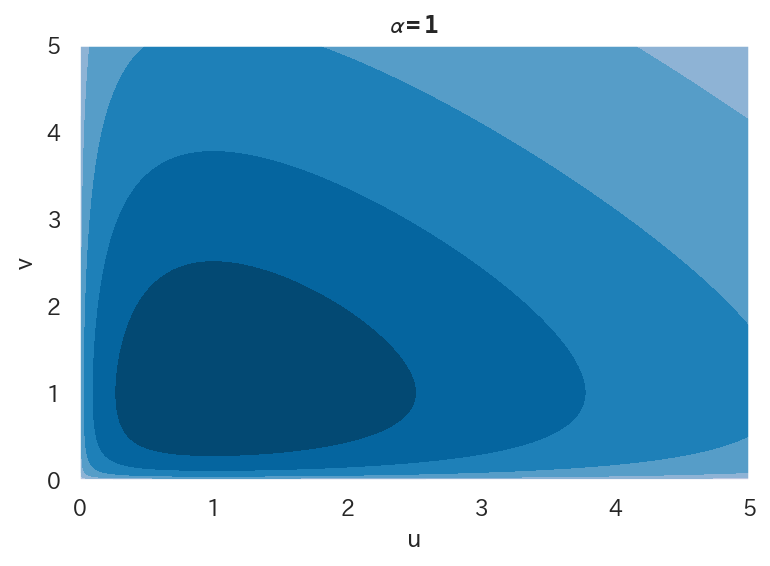

In [137]:
show_contourf(1)

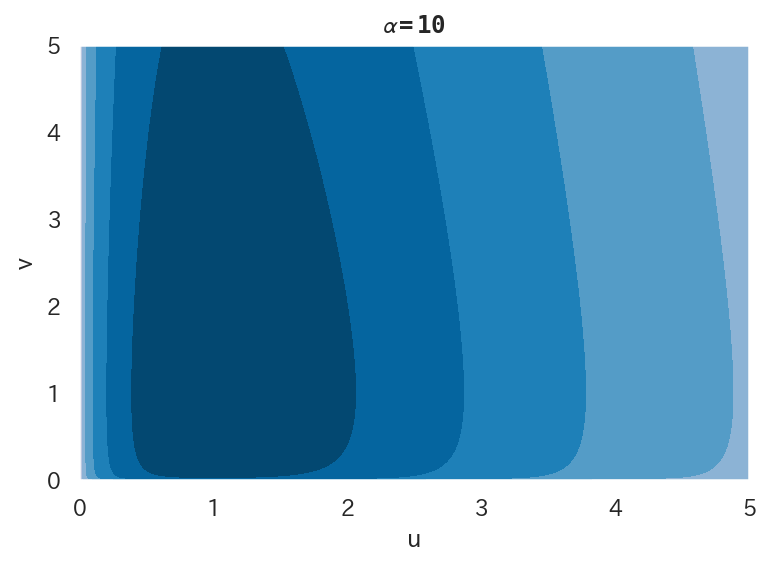

In [138]:
show_contourf(10)

In [143]:
def func(V,tau,alp):
    u=V[0]*(1-V[1])
    v=alp*V[1]*(V[0]-1)
    return [u,v]

In [154]:
alp=1
V0=[4,1] #被食者、捕食者
tau = np.arange(0, 100, 0.001)
v=odeint(func,V0,tau,args=(alp,))

Text(0.5, 1.0, '$\\alpha=1$')

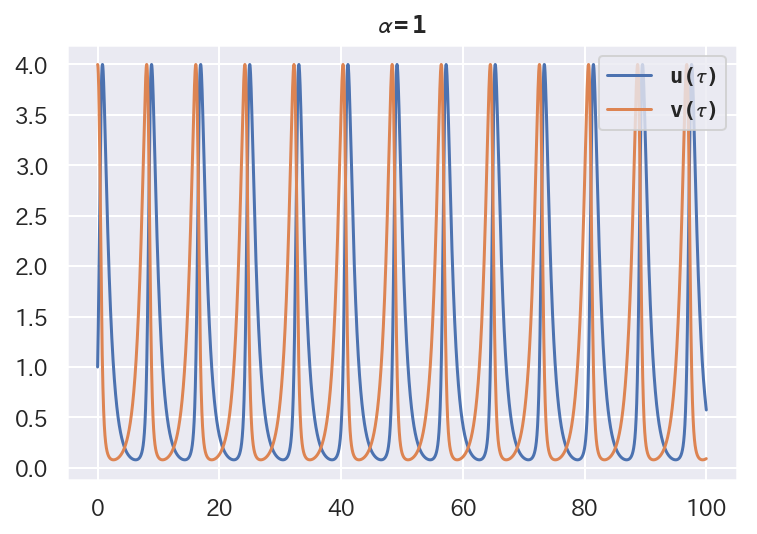

In [155]:
plt.plot(tau,v[:,1],label=r'$u(\tau)$')
plt.plot(tau,v[:,0],label=r'$v(\tau)$')
plt.legend(loc='upper right')
plt.title(r'$\alpha=1$')
#ロトカ・ヴォルテラの解の一例

In [152]:
alp=0.1
V0=[4,1] #被食者、捕食者
tau = np.arange(0, 100, 0.001)
v=odeint(func,V0,tau,args=(alp,))

Text(0.5, 1.0, '$\\alpha=0.1$')

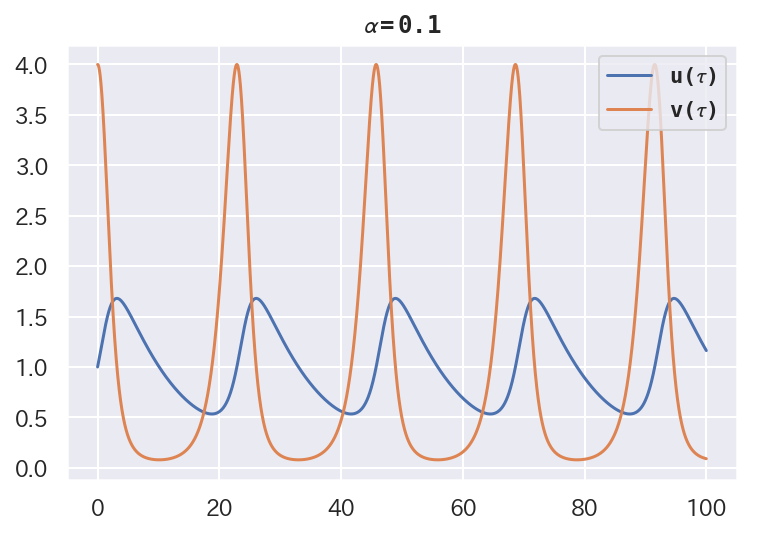

In [153]:
plt.plot(tau,v[:,1],label=r'$u(\tau)$')
plt.plot(tau,v[:,0],label=r'$v(\tau)$')
plt.legend(loc='upper right')
plt.title(r'$\alpha=0.1$')
#ロトカ・ヴォルテラの解の一例

(0, 2)

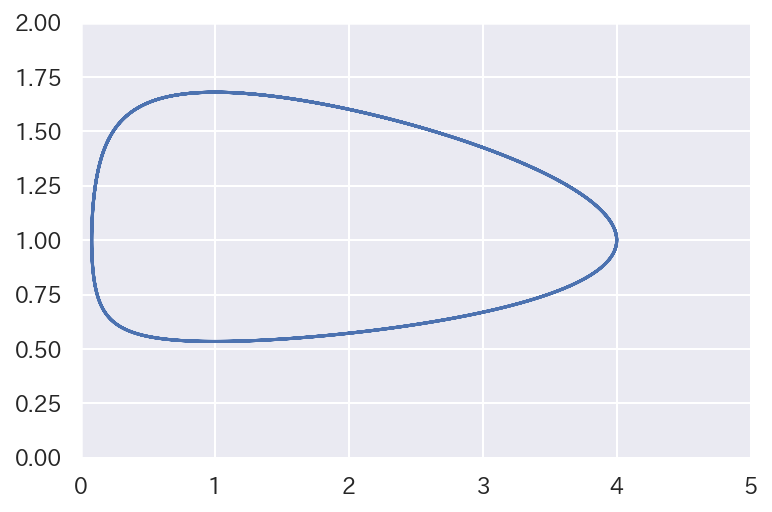

In [142]:
plt.plot(v[:,0],v[:,1])
plt.xlim(0,5)
plt.ylim(0,2)

In [69]:
alp=1
V0=[1,1] #被食者、捕食者
tau = np.arange(0, 100, 0.001)
v=odeint(func,V0,tau,args=(alp,))

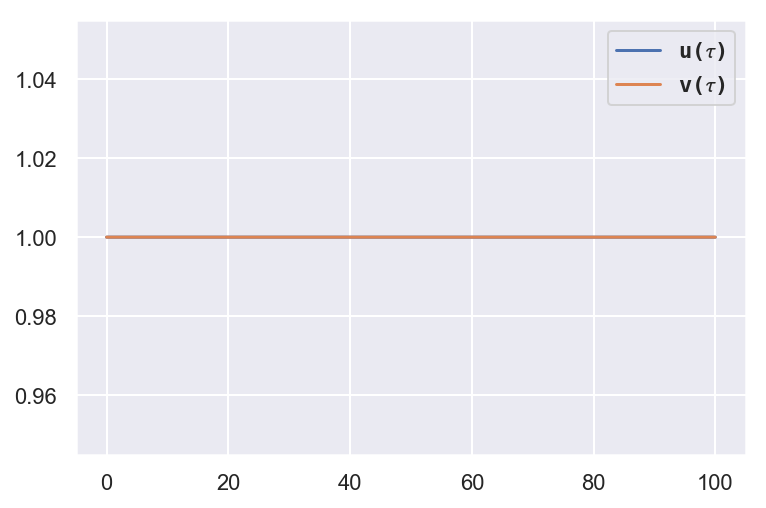

In [70]:
plt.plot(tau,v[:,1],label=r'$u(\tau)$')
plt.plot(tau,v[:,0],label=r'$v(\tau)$')
plt.legend(loc='upper right')

#ロトカ・ヴォルテラの解の一例

(0, 2)

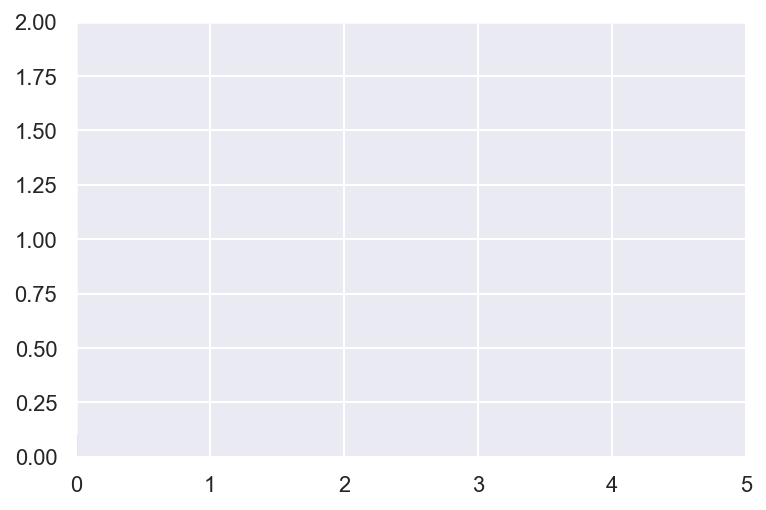

In [64]:
plt.plot(v[:,0],v[:,1])
plt.xlim(0,5)
plt.ylim(0,2)

In [6]:
def func(v,u,alp):
    v=alp*v*(u-1)/(u*(1-v))
    return v

In [7]:
alp=10
V0=100 #被食者、捕食者
t = np.arange(3, 1000, 0.001)

v=odeint(func,V0,t,args=(alp,))

/Users/denkenhii/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/scipy/integrate/odepack.py:236: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


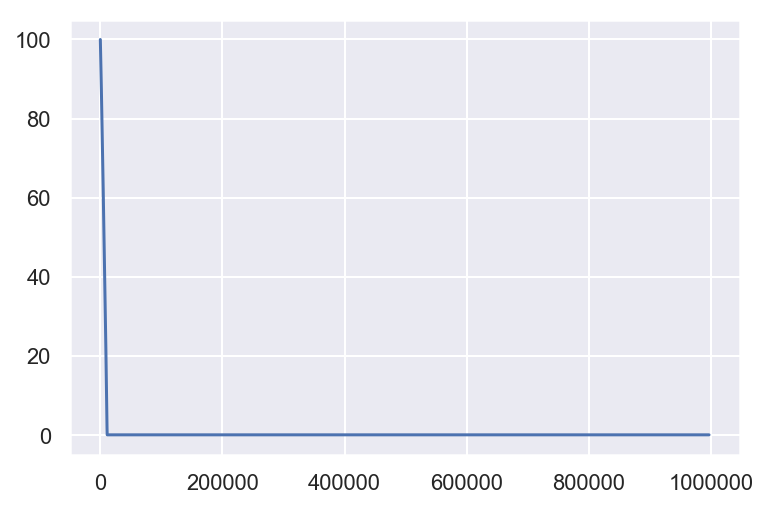

In [8]:
plt.plot(v)